In [3]:
from dataprovider.davis import DataAccessHelper
import matplotlib.pyplot as plt
%matplotlib inline

davis = DataAccessHelper()
train_seq_list = davis.train_sequence_list()
print(train_seq_list)




['bear', 'bmx-bumps', 'boat', 'breakdance-flare', 'bus', 'car-turn', 'dance-jump', 'dog-agility', 'drift-turn', 'elephant', 'flamingo', 'hike', 'hockey', 'horsejump-low', 'kite-walk', 'lucia', 'mallard-fly', 'mallard-water', 'motocross-bumps', 'motorbike', 'paragliding', 'rhino', 'rollerblade', 'scooter-gray', 'soccerball', 'stroller', 'surf', 'swing', 'tennis', 'train']


/usr/stud/george/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/stud/george/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/stud/george/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface

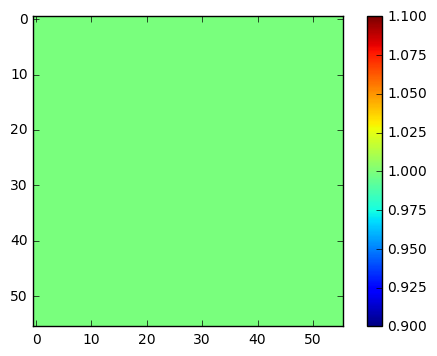

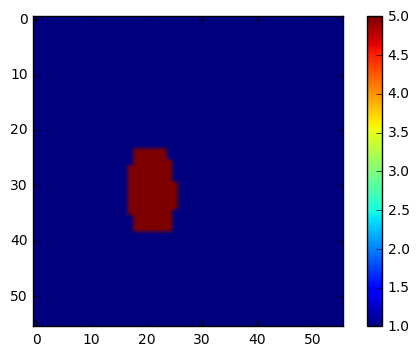

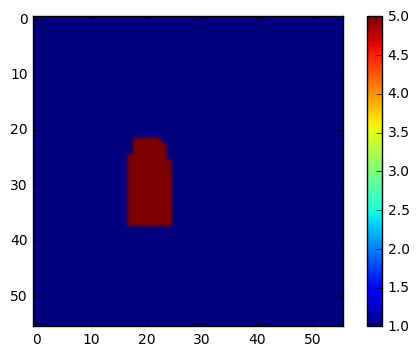

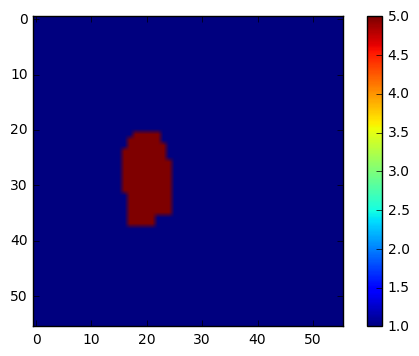

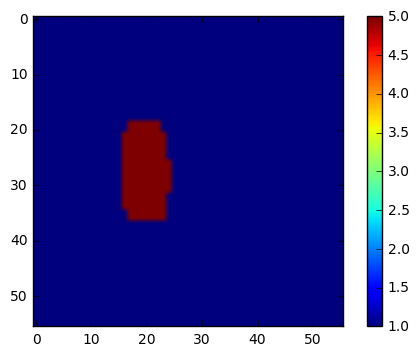

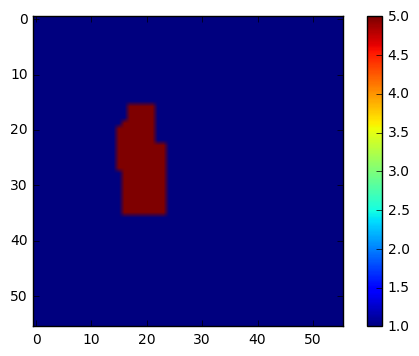

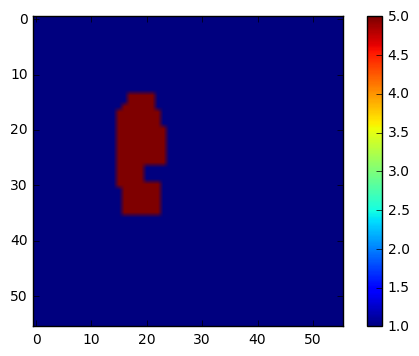

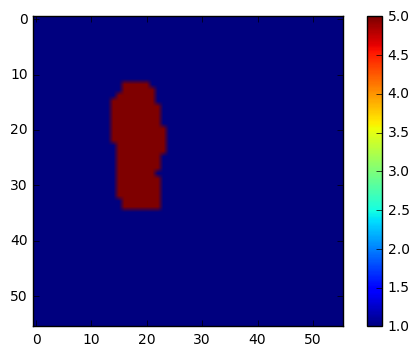

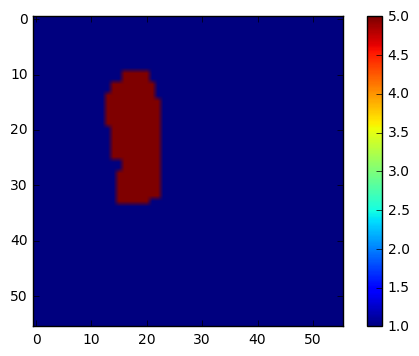

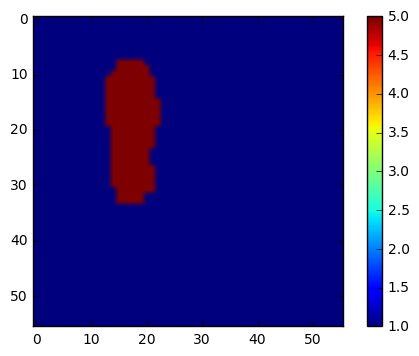

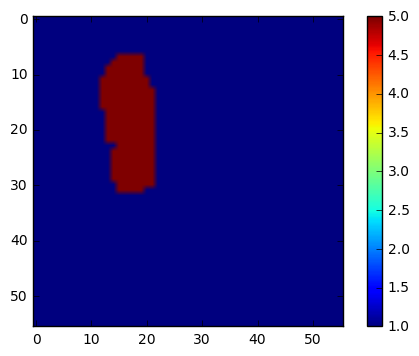

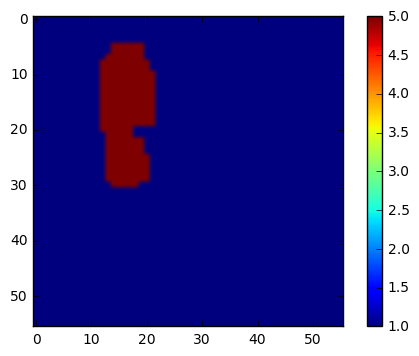

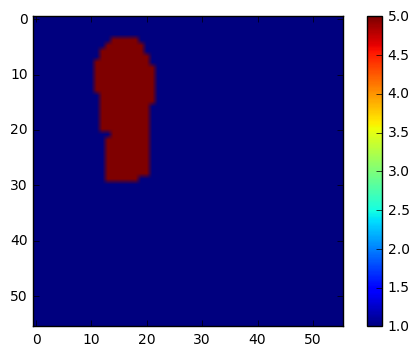

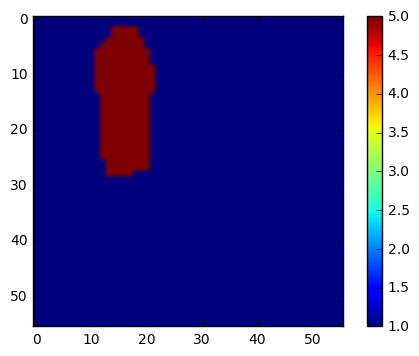

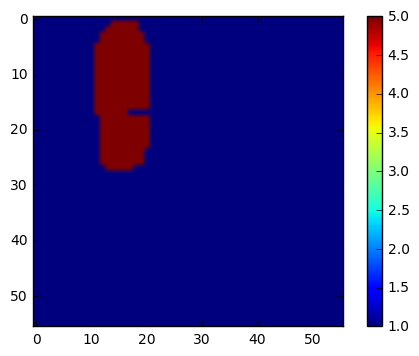

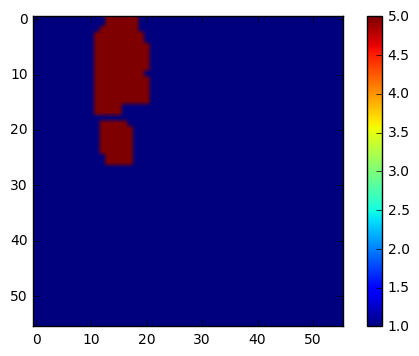

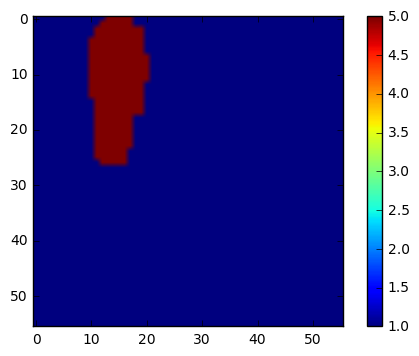

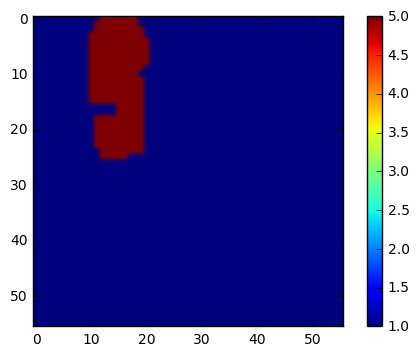

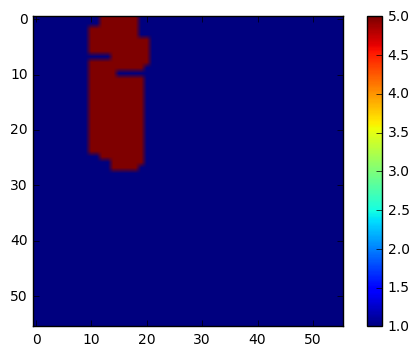

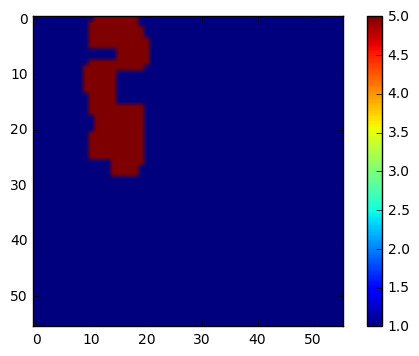

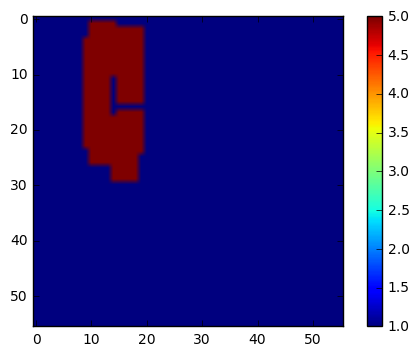

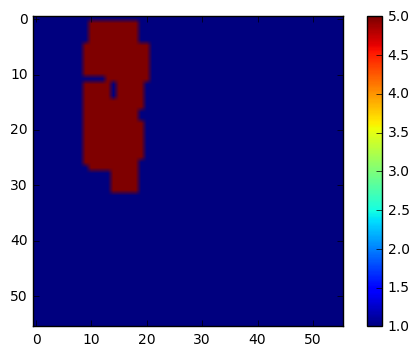

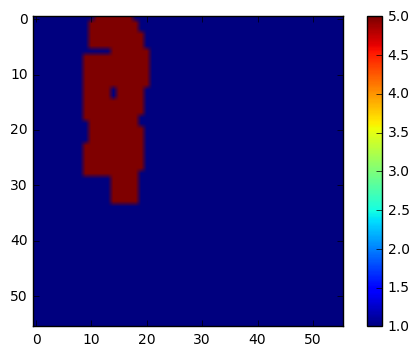

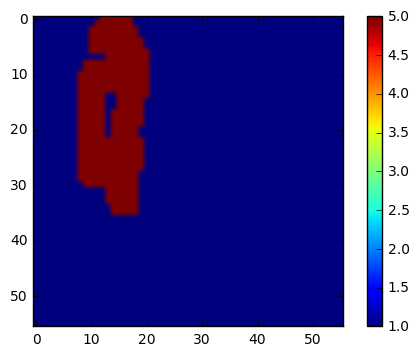

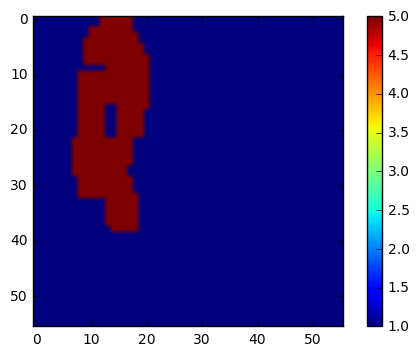

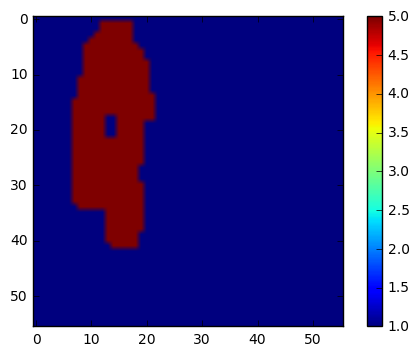

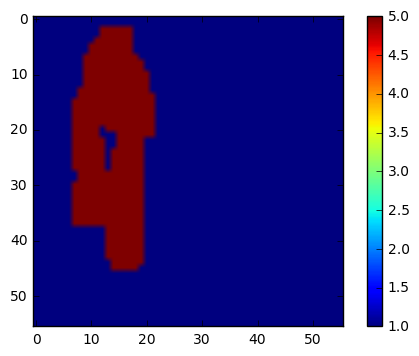

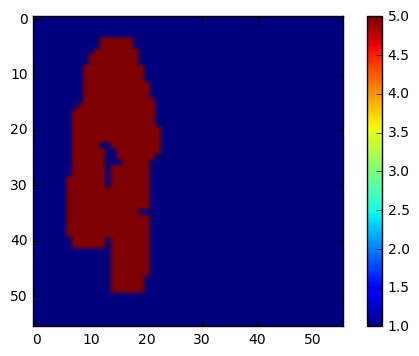

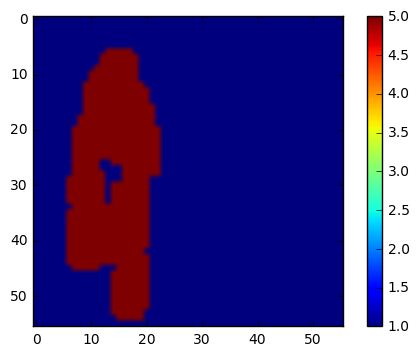

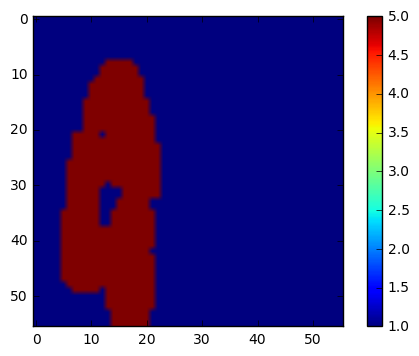

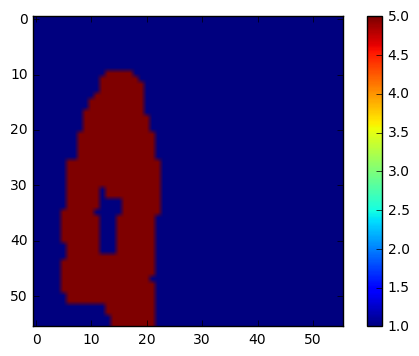

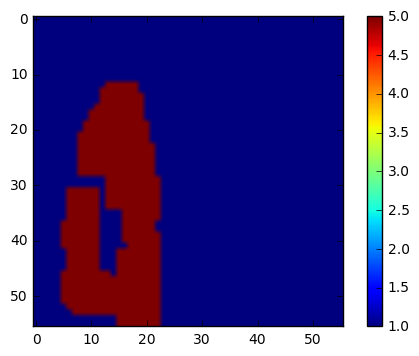

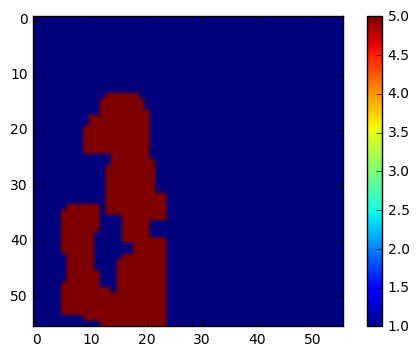

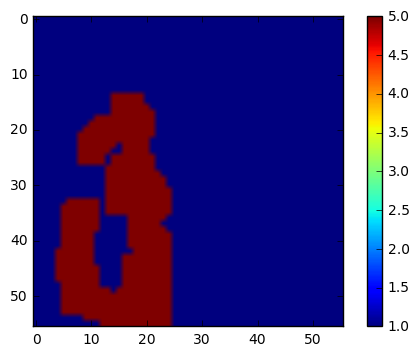

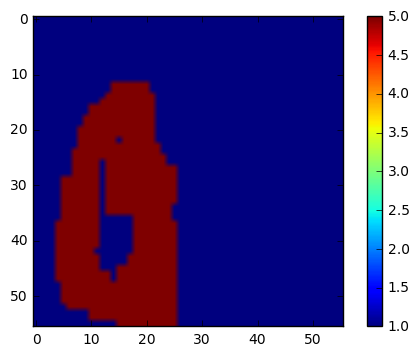

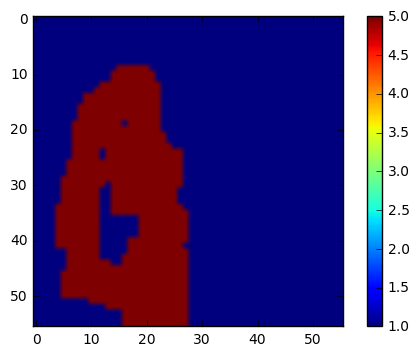

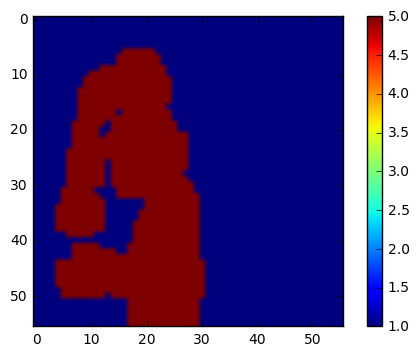

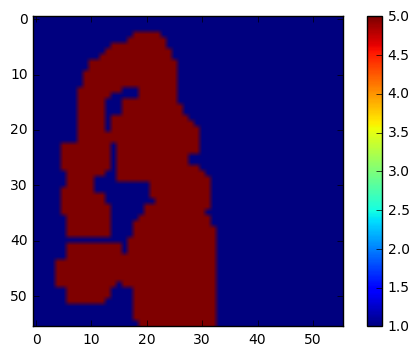

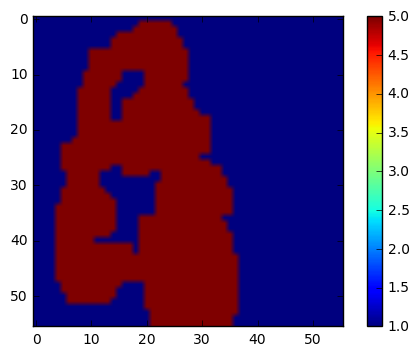

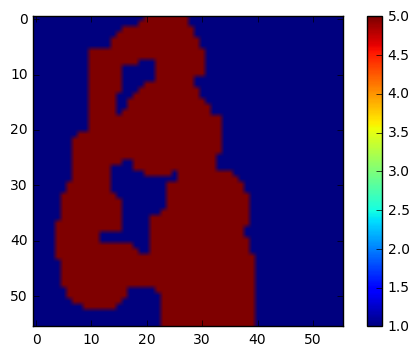

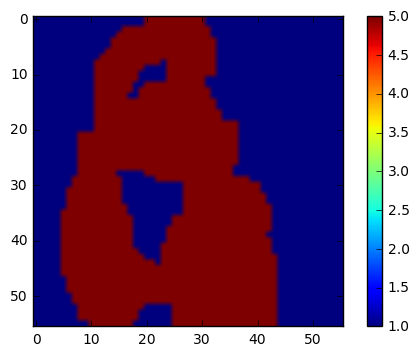

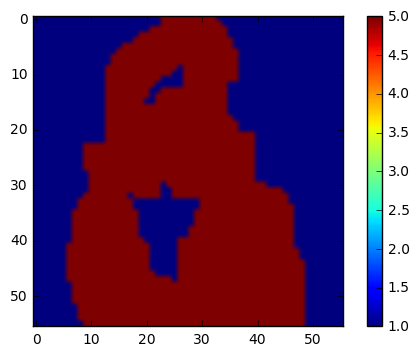

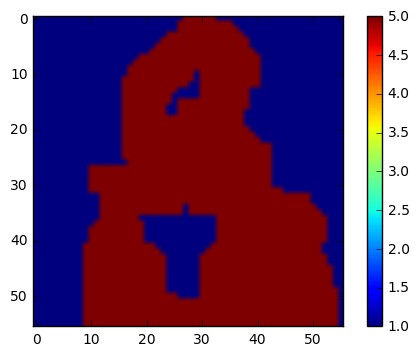

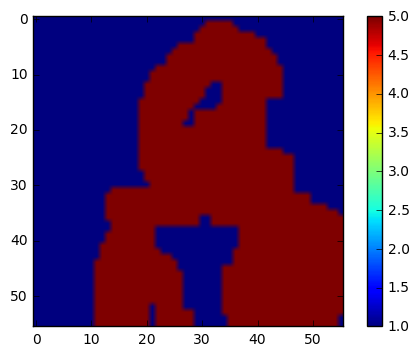

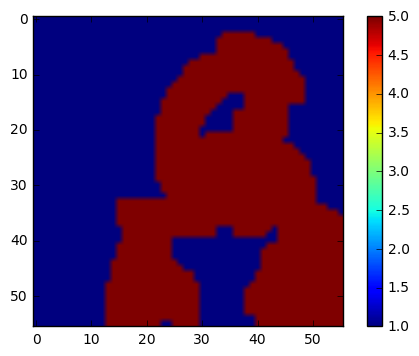

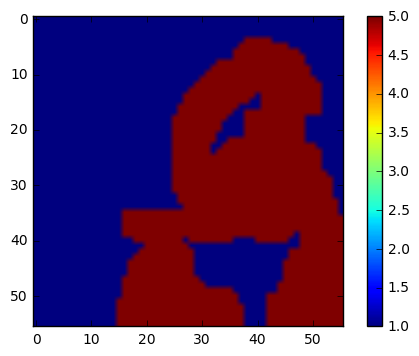

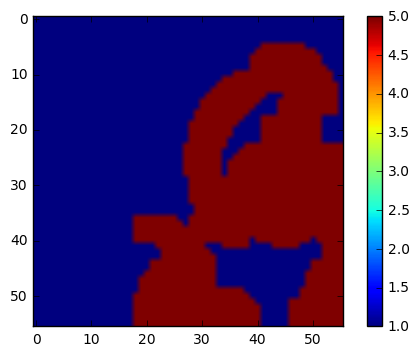

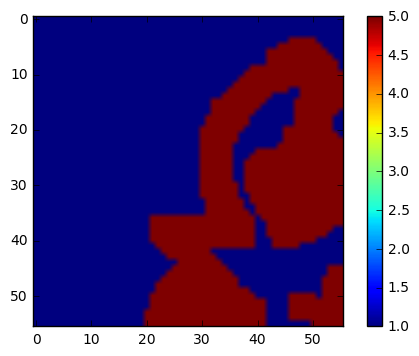

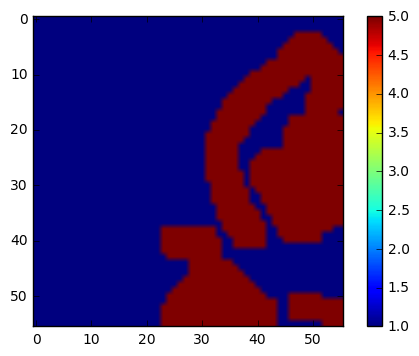

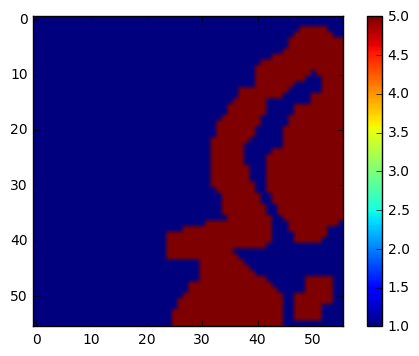

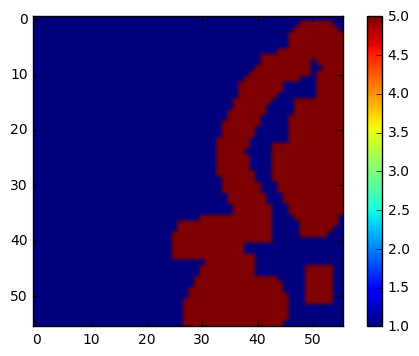

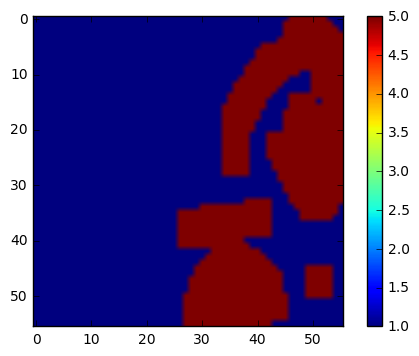

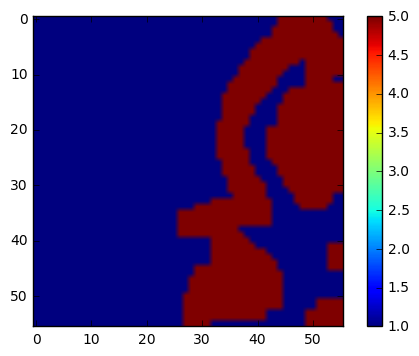

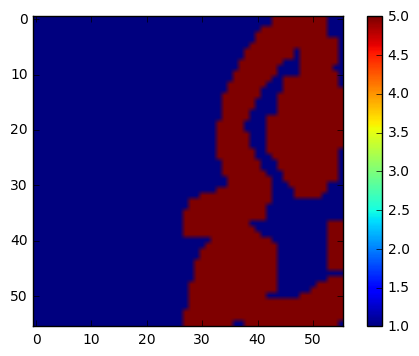

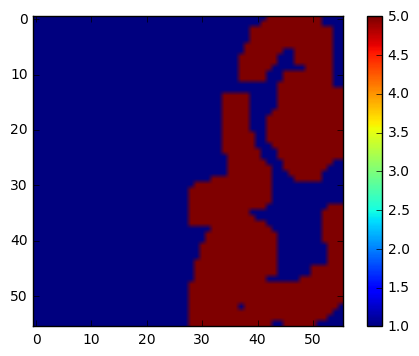

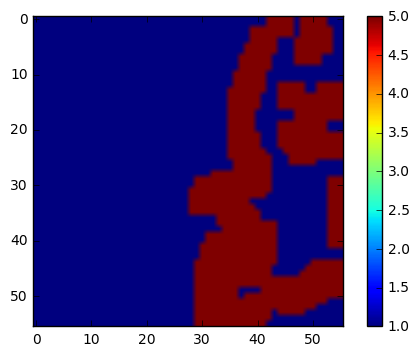

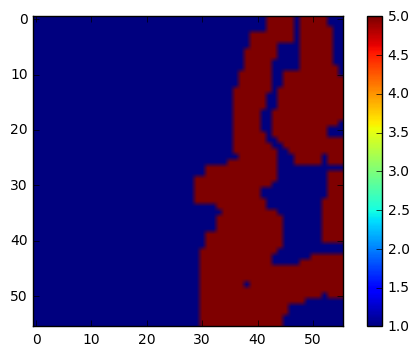

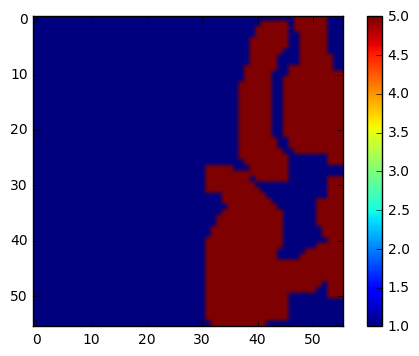

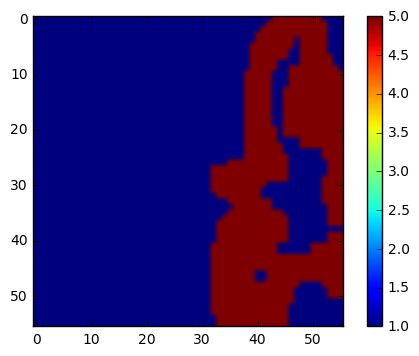

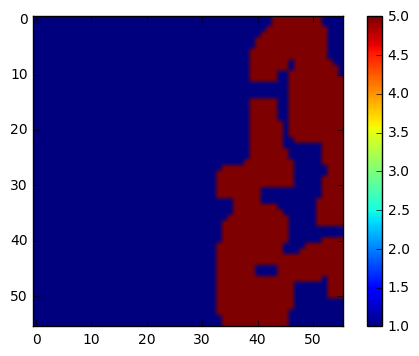

In [25]:
seq_name = 'motocross-bumps'
frame_nums = davis.all_frames_nums(seq_name)
for no in frame_nums:
    img_path = davis.image_path(seq_name,no)
    img = davis.get_weight_map(img_path,[56,56])
    plt.figure()
    plt.imshow(img)
    plt.colorbar()

/usr/stud/george/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/stud/george/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/stud/george/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface

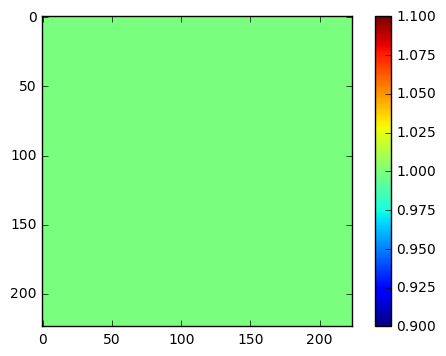

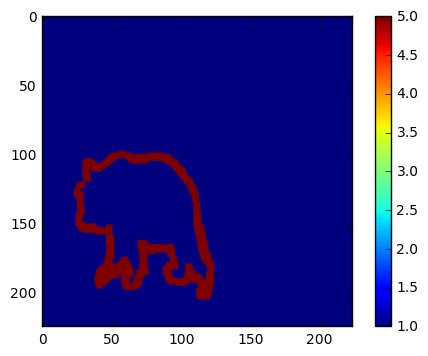

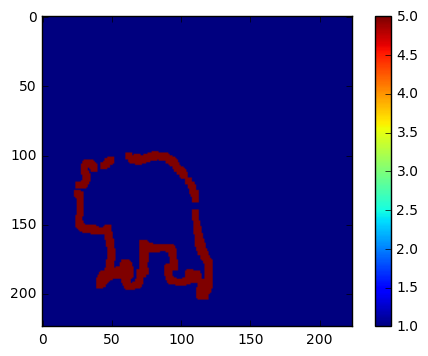

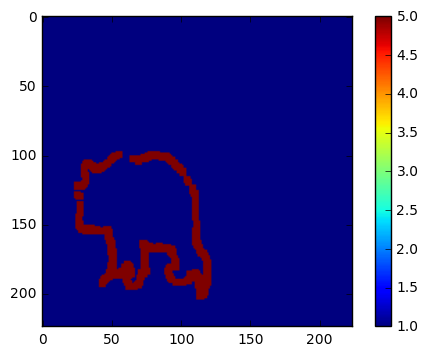

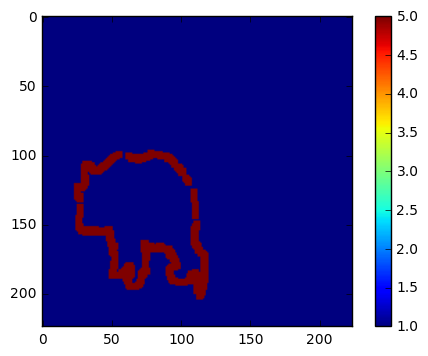

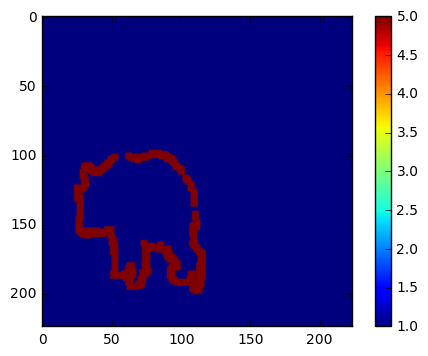

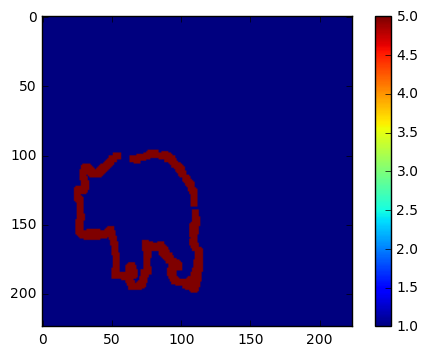

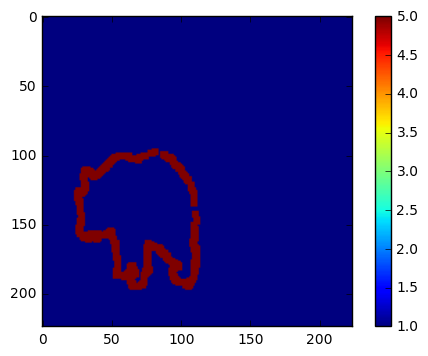

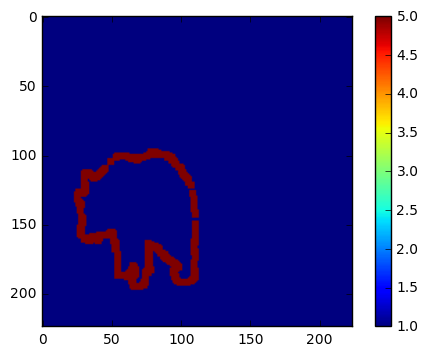

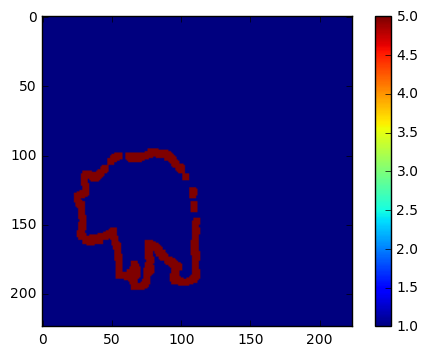

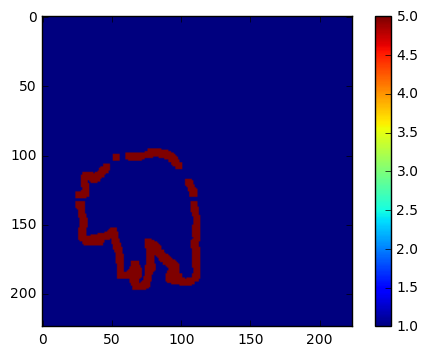

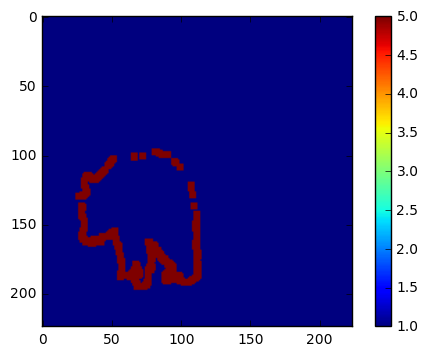

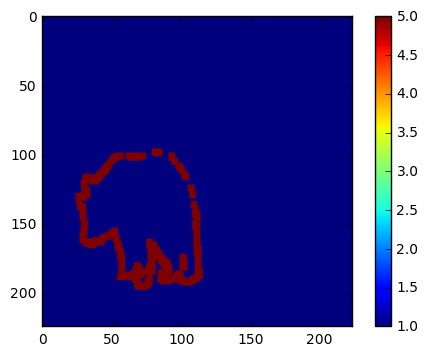

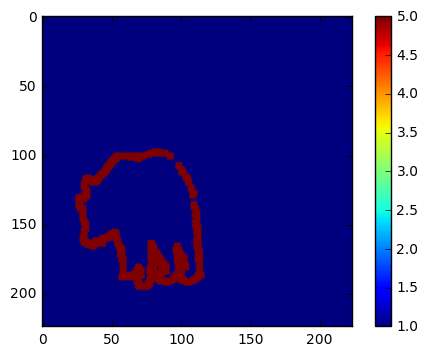

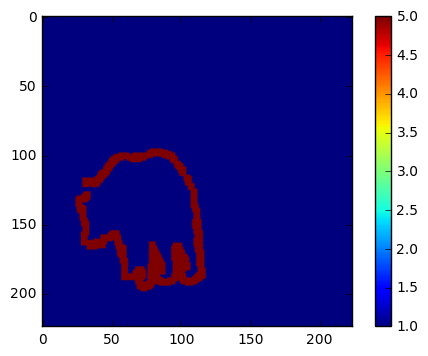

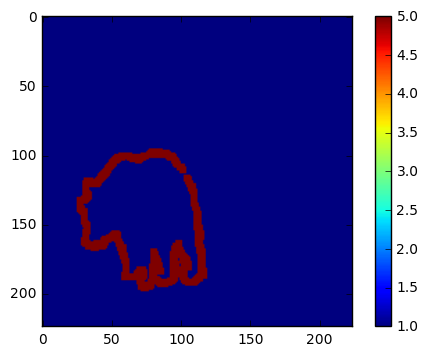

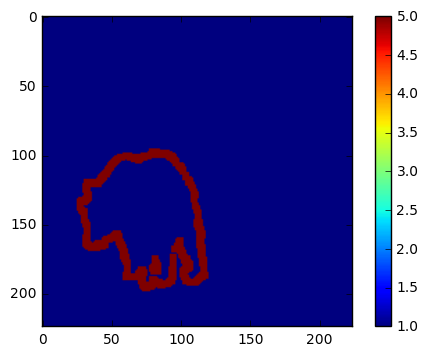

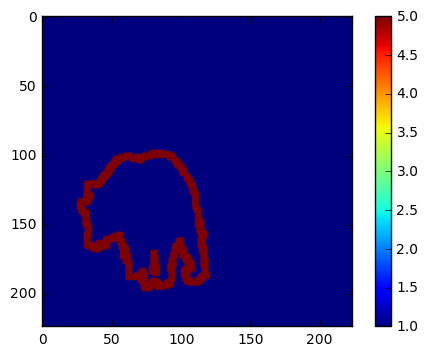

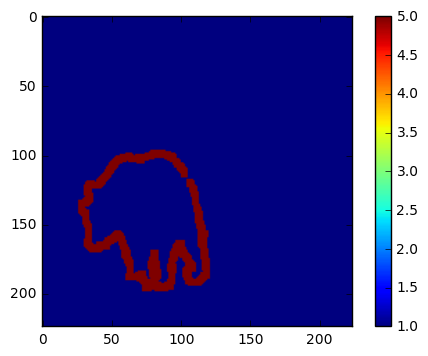

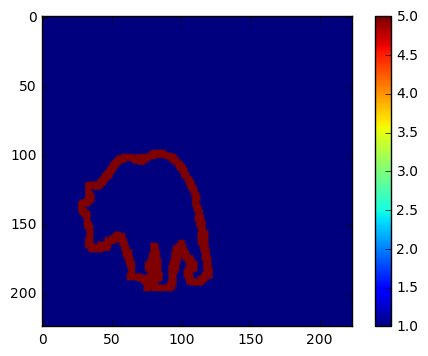

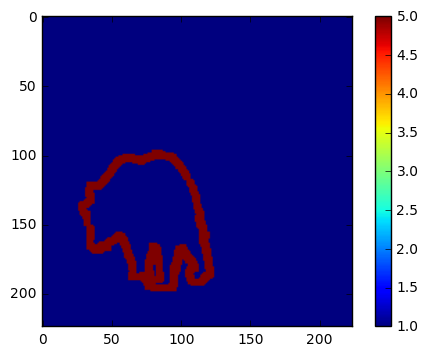

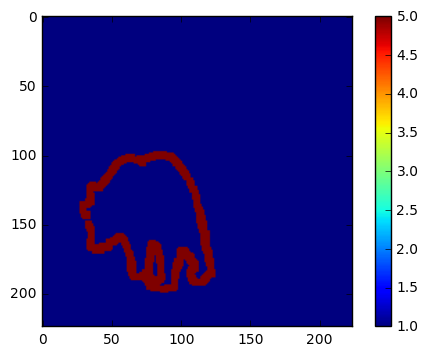

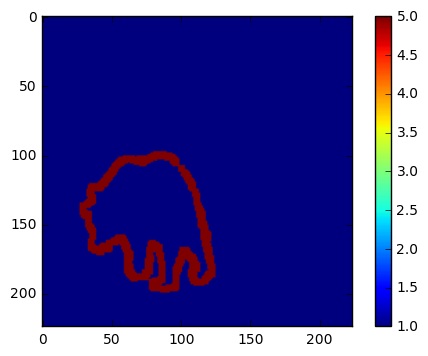

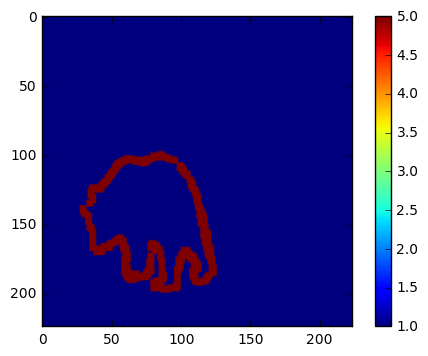

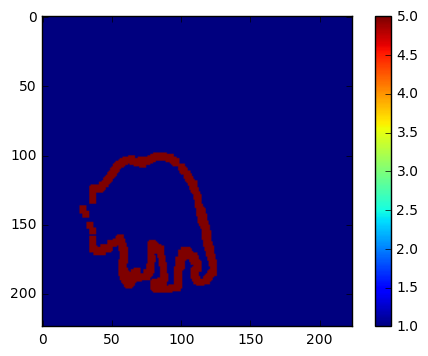

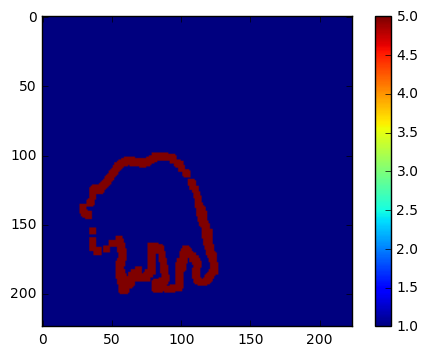

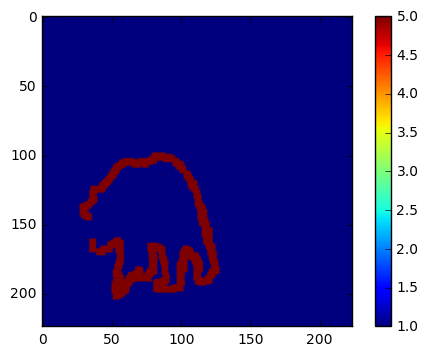

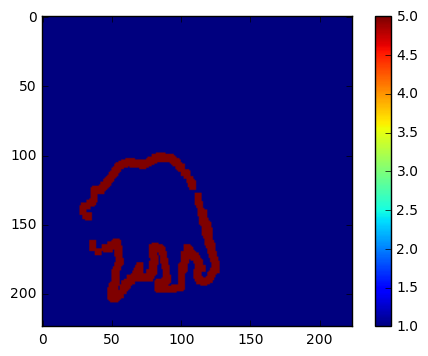

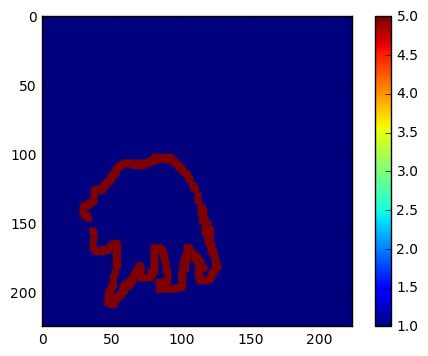

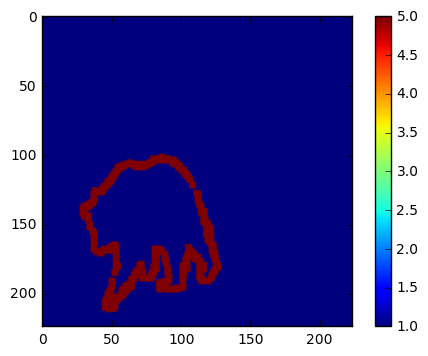

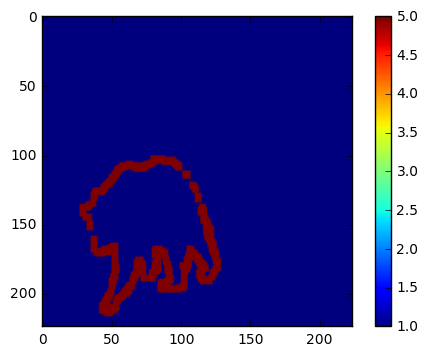

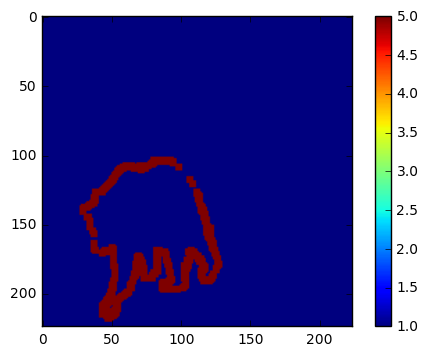

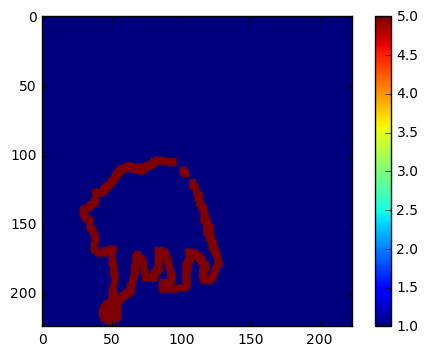

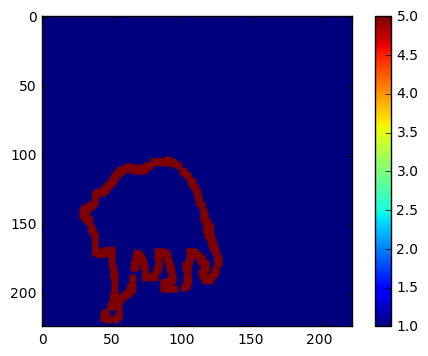

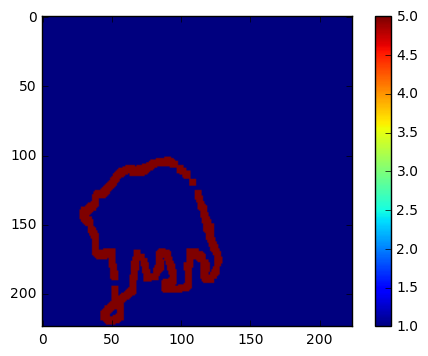

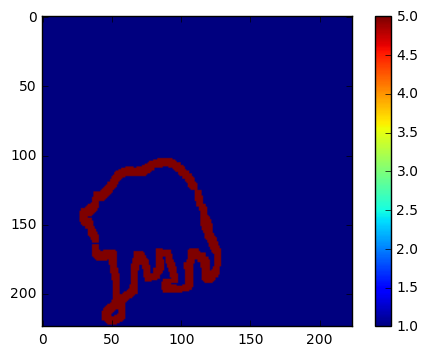

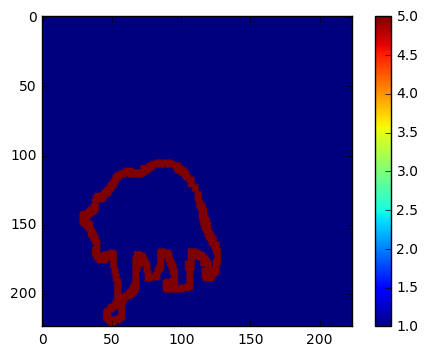

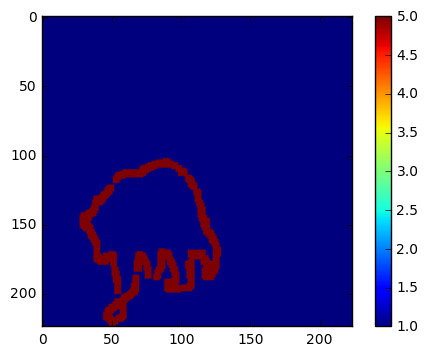

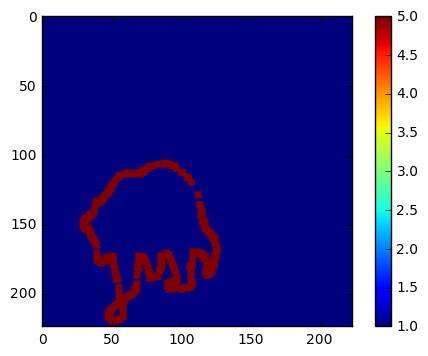

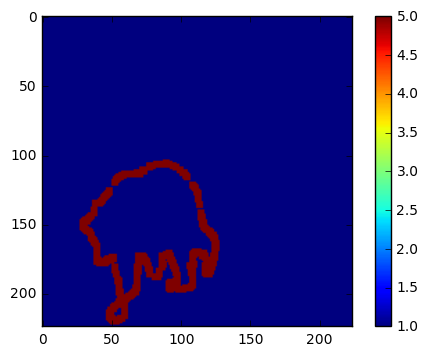

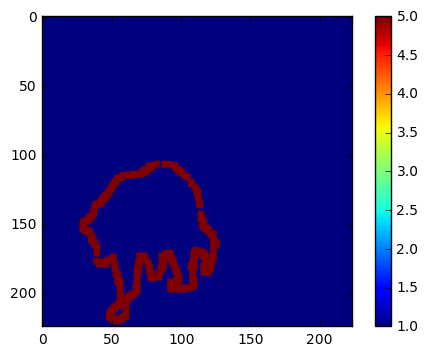

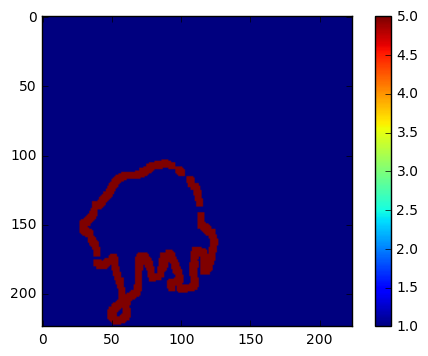

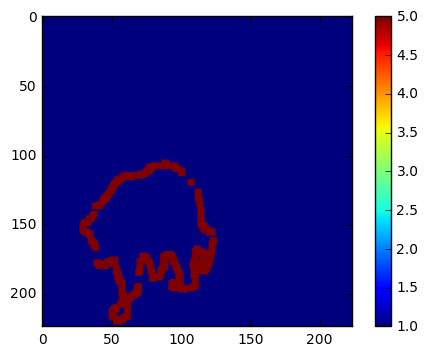

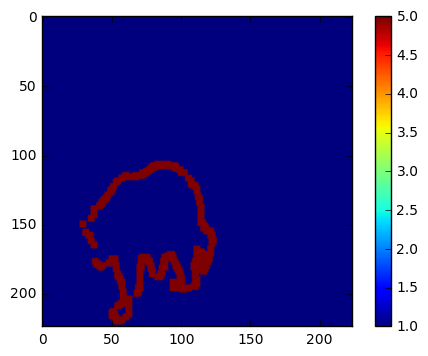

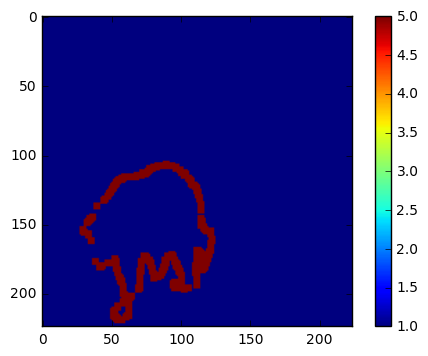

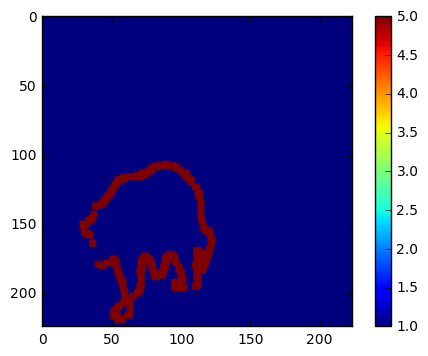

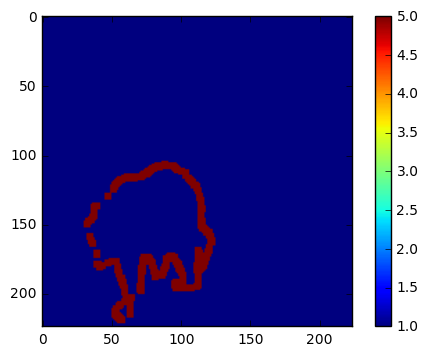

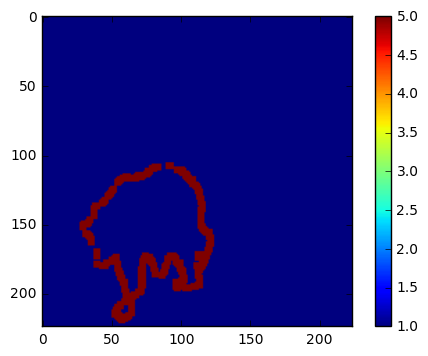

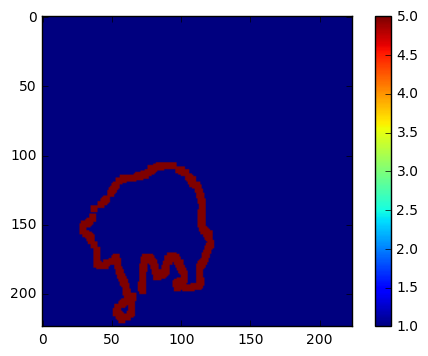

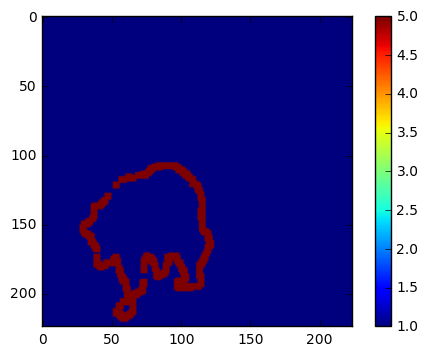

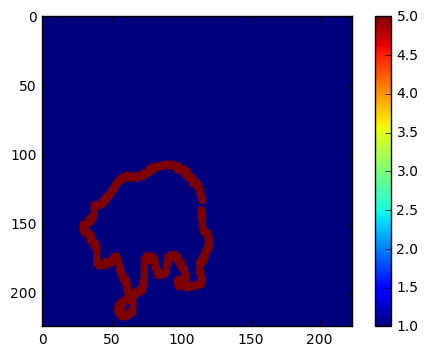

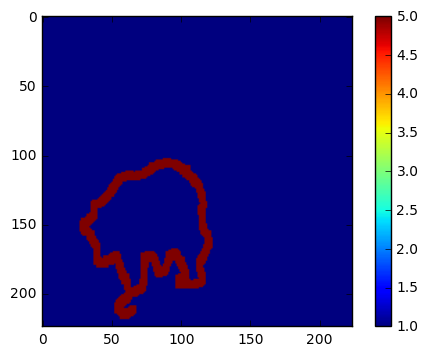

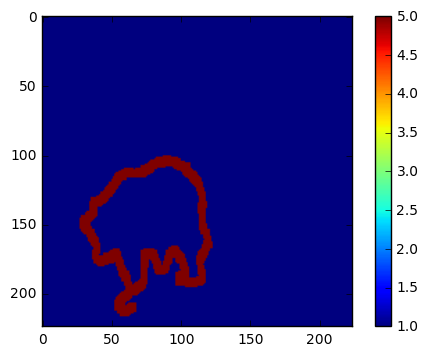

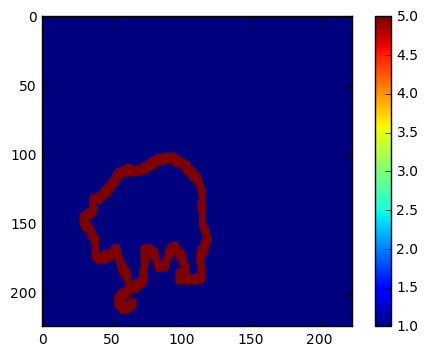

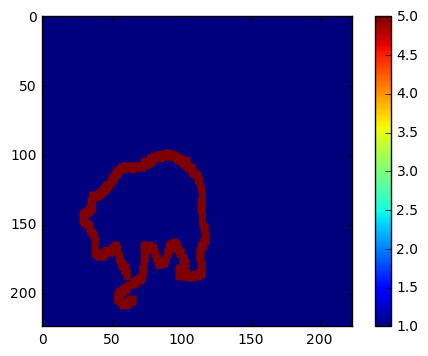

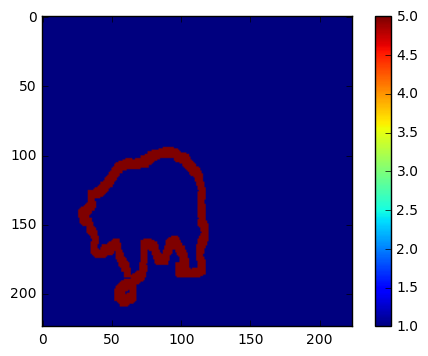

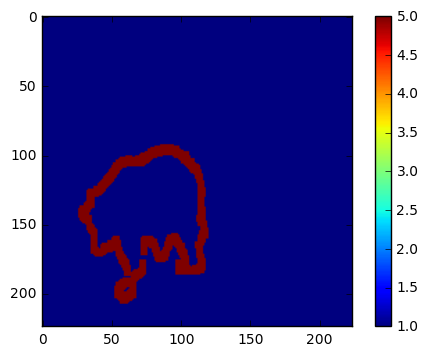

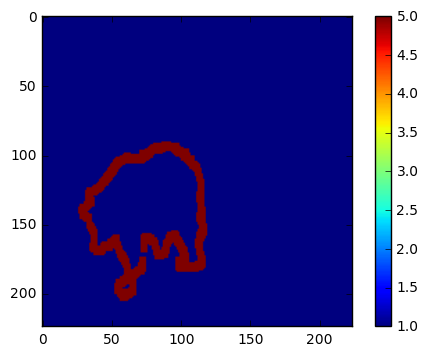

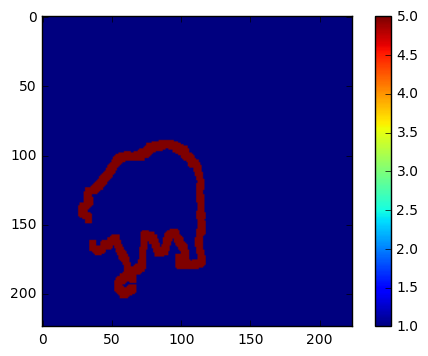

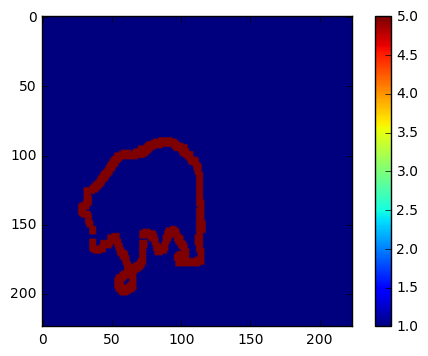

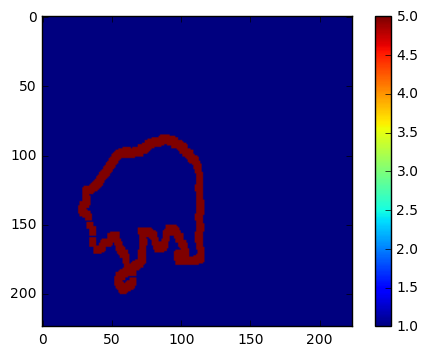

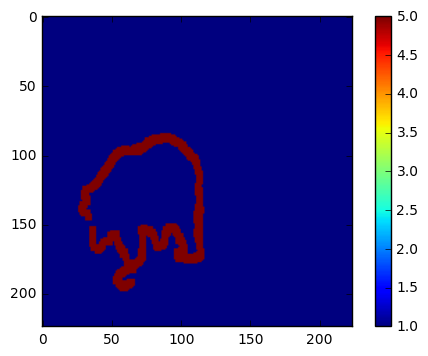

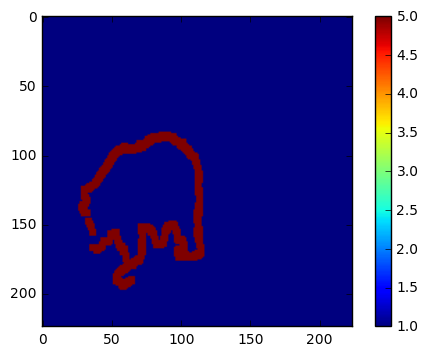

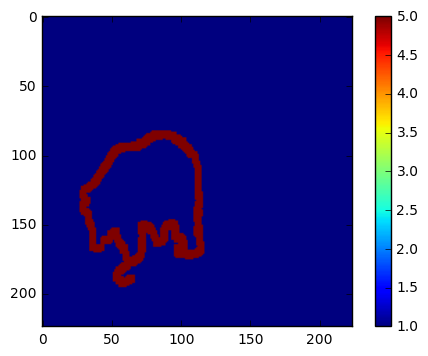

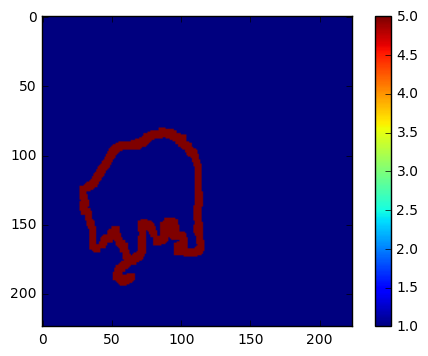

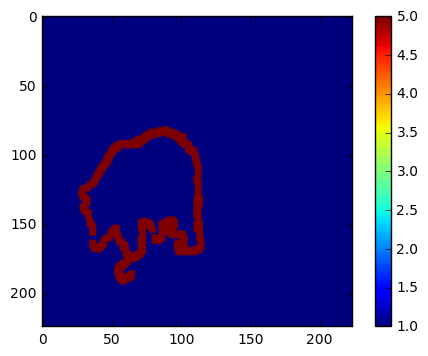

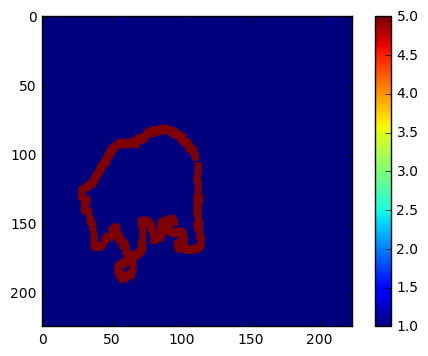

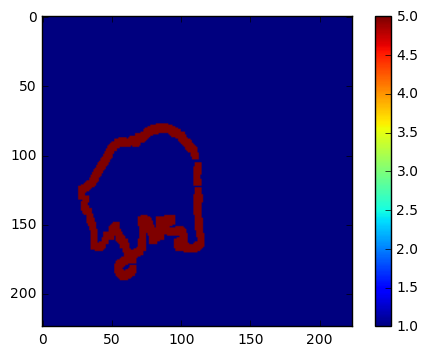

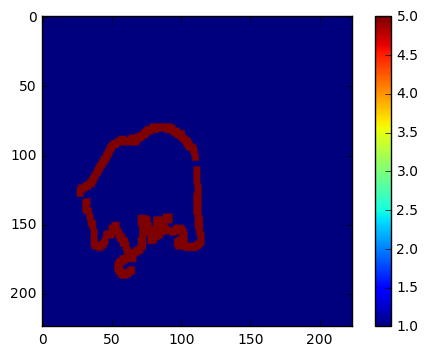

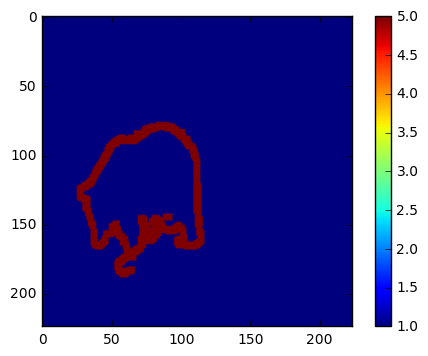

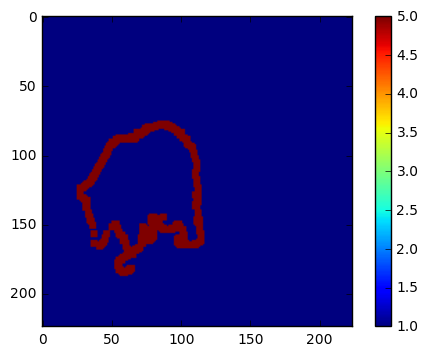

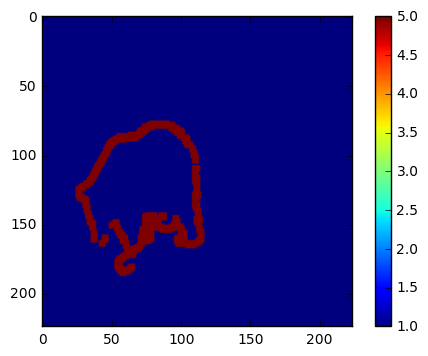

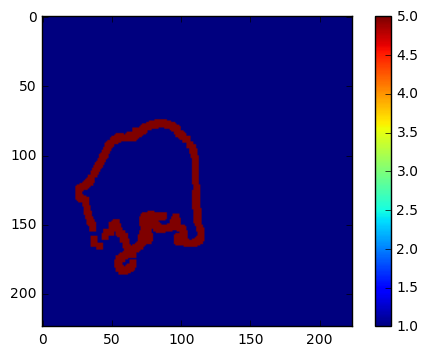

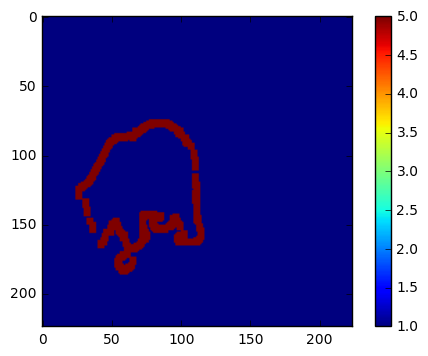

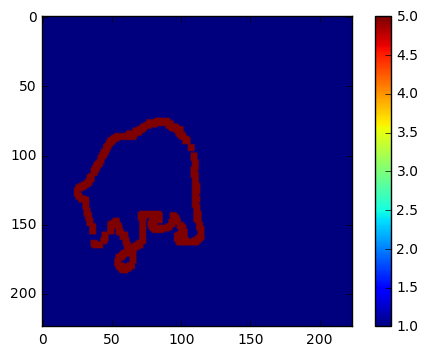

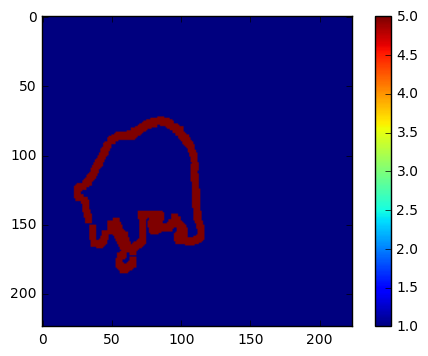

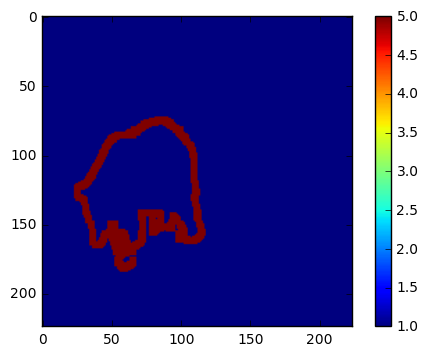

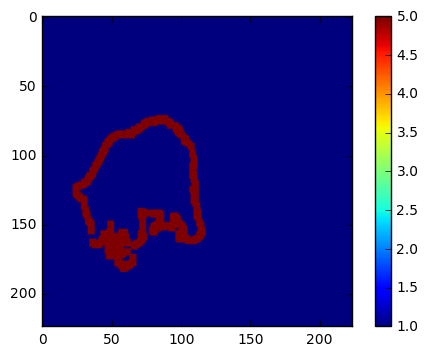

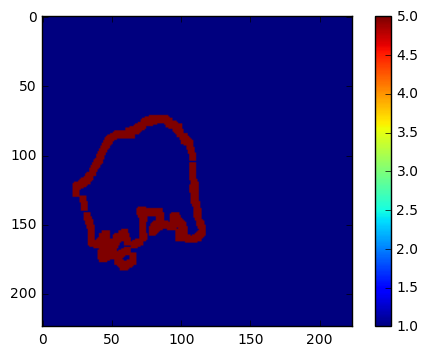

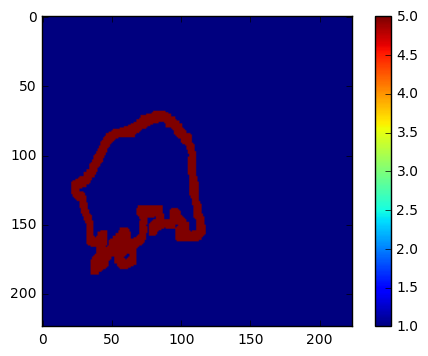

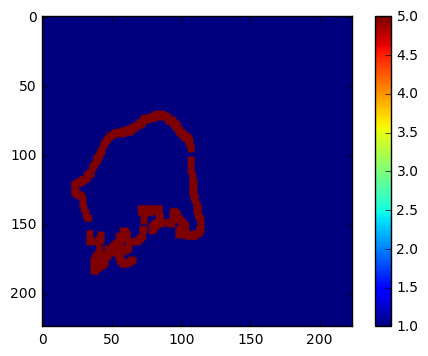

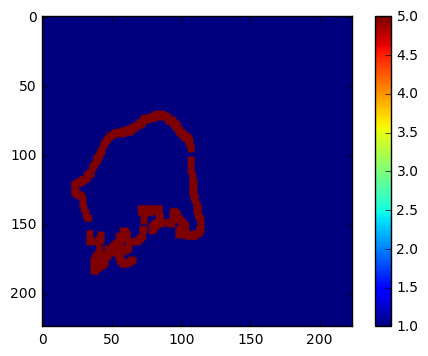

In [7]:
seq_name = 'bear'
frame_nums = davis.all_frames_nums(seq_name)
for no in frame_nums:
    img_path = davis.image_path(seq_name,no)
    img = davis.get_weight_map(img_path,[224,224])
    plt.figure()
    plt.imshow(img)
    plt.colorbar()

In [24]:
from itertools import groupby
import numpy as np
for seq in train_seq_list:
    seq_name = seq
    frame_nums = davis.all_frames_nums(seq_name)
    contor_pxl_cnt56 = 0
    other_pxl_cnt56 = 0
    contor_pxl_cnt224 = 0
    other_pxl_cnt224 = 0
    for no in frame_nums:
        img_path = davis.image_path(seq_name,no)
        wm_56 = davis.get_weight_map(img_path,[56,56])>1
        wm_224 = davis.get_weight_map(img_path,[224,224])>1
        bincnts56 =  np.bincount(wm_56.ravel(),minlength=2)
        bincnts224 =  np.bincount(wm_224.ravel(),minlength=2)

        #print (bincnts56)
        other_pxl_cnt56 = other_pxl_cnt56 +  bincnts56[0]
        contor_pxl_cnt56 = contor_pxl_cnt56 + bincnts56[1]

        other_pxl_cnt224 = other_pxl_cnt224 +  bincnts224[0]
        contor_pxl_cnt224 = contor_pxl_cnt224 + bincnts224[1]

    ratio56 = other_pxl_cnt56/contor_pxl_cnt56
    ratio224 = other_pxl_cnt224/contor_pxl_cnt224

    print( "{} {} {}".format(seq_name,ratio56,ratio224))


bear 7.847175393931053 18.655524609820997
bmx-bumps 10.890798786653185 19.239875221857687
boat 7.240776426894643 14.389396888750756
breakdance-flare 5.025872801082544 11.185597548169508
bus 4.243489528905237 8.875270002312549
car-turn 10.316703504894221 28.16679382379655
dance-jump 5.526534859521332 12.255896896231357
dog-agility 4.172186304261776 8.488868885073035
drift-turn 6.2037615304547575 15.761650242191415
elephant 5.168068053301863 10.539354912895993
flamingo 6.291115696474759 15.162865610101791
hike 10.46513115802943 22.809150978089374
hockey 5.98731469653308 13.545004792678025
horsejump-low 5.453560159143915 12.263313713741939
kite-walk 4.617554858934169 9.491556477897339
lucia 8.641178795731038 19.85960838346825
mallard-fly 9.095658572479765 18.142273210344168
mallard-water 12.17231964717001 30.703537551436266
motocross-bumps 3.8649067921503737 8.006937941474769
motorbike 9.055779269202088 17.398765211014183
paragliding 14.700185953368617 38.382407355497
rhino 6.514777144682

In [1]:
a = [1,1,1,1,2,2,2,2,3,3,4,5,5]
from itertools import groupby
[len(list(group)) for key, group in groupby(a)]


[4, 4, 2, 1, 2]